In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
bank=pd.read_csv("/content/bank-full.csv",";")

<ipython-input-7-cb700796d31f>:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  bank=pd.read_csv("/content/bank-full.csv",";")


In [ ]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# **EDA**

In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
bank[bank.duplicated()].shape

(0, 17)

In [ ]:
# Converting categorical data to numeric by Onehot encoding.
bank1=pd.get_dummies(bank,columns=["job","marital","education","default","housing","loan","contact","month","poutcome"])
bank1["y"]=bank1["y"].replace("yes",1)
bank1["y"]=bank1["y"].replace("no",0)

In [ ]:
bank1

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,1729,17,456,2,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,5715,17,1127,5,184,3,1,0,0,...,0,0,0,1,0,0,0,0,1,0
45209,57,668,17,508,4,-1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
bank1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   balance              45211 non-null  int64
 2   day                  45211 non-null  int64
 3   duration             45211 non-null  int64
 4   campaign             45211 non-null  int64
 5   pdays                45211 non-null  int64
 6   previous             45211 non-null  int64
 7   y                    45211 non-null  int64
 8   job_admin.           45211 non-null  uint8
 9   job_blue-collar      45211 non-null  uint8
 10  job_entrepreneur     45211 non-null  uint8
 11  job_housemaid        45211 non-null  uint8
 12  job_management       45211 non-null  uint8
 13  job_retired          45211 non-null  uint8
 14  job_self-employed    45211 non-null  uint8
 15  job_services         45211 non-null  uint8
 16  job_student          4

# **Model Building**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Dividing our data into input and output variables

x=pd.concat([bank1.iloc[:,0:7],bank1.iloc[:,8:]],axis=1) # Independent variables
y=bank1.iloc[:,7]                                          # Dependent variables

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y)

In [ ]:
model=LogisticRegression()
model.fit(xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# **Model Prediction**

In [ ]:
pred=model.predict(x)
pred

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
df=pd.DataFrame({"Actual":y,"Predicted value":pred})
df

,Actual,Predicted value
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,0
45207,1,0
45208,1,1
45209,0,0


# **Testing Model Accuracy**


In [ ]:
# Confusion Matrix for the model accuracy

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y,pred)
cm

array([[39331,   591],
       [ 4411,   878]])

In [ ]:
#model score

(39154+878)/(39154+591+4411+878)

0.8889283652351556

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

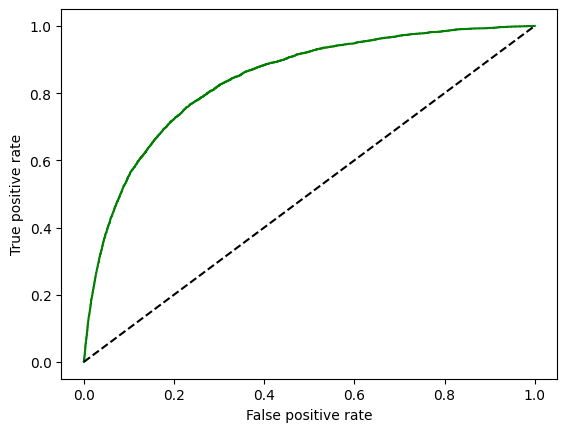

In [ ]:
# ROC Curve for plotting and finding AUC score

fpr,tpr,thresholds=roc_curve(y,model.predict_proba(x)[:,1]) #[:,1] will get the predicted probabilities of the positive label only
auc=roc_auc_score(y,pred)# compute roc_auc_score based on y and y predicted

plt.plot(fpr,tpr,color="green")
plt.plot([0,1],[0,1],"k--")# x axis range is 0 to 1, y axis range is 0 to 1, k-- is a line type - dotted
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

In [ ]:
auc

0.5756005241607028